In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
import keras


from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1148s 7us/step


In [ ]:
class_names = ['Airplane', 'Car', 'Birs',
                'Cat', 'Deer','Dog','Frog',
                'Horse','Ship', 'Truck']
 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
number_cat=10

In [5]:
y_train=keras.utils.to_categorical(y_train,number_cat)

In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_test=keras.utils.to_categorical(y_test,number_cat)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [34]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [8]:
Input_shape = X_train.shape[1:]

In [9]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units=10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)        

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,
                  validation_split=0.2 ,
                  batch_size=32,
                  epochs=100,shuffle=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 37s 931us/step - loss: 1.7212 - accuracy: 0.3591 - val_loss: 1.3638 - val_accuracy: 0.5097
Epoch 2/100
40000/40000 [==============================] - 37s 917us/step - loss: 1.3684 - accuracy: 0.5074 - val_loss: 1.1980 - val_accuracy: 0.5828
Epoch 3/100
40000/40000 [==============================] - 37s 921us/step - loss: 1.2199 - accuracy: 0.5683 - val_loss: 1.0706 - val_accuracy: 0.6230
Epoch 4/100
40000/40000 [==============================] - 37s 919us/step - loss: 1.1286 - accuracy: 0.6021 - val_loss: 1.0408 - val_accuracy: 0.6353
Epoch 5/100
40000/40000 [==============================] - 37s 919us/step - loss: 1.0514 - accuracy: 0.6295 - val_loss: 0.8936 - val_accuracy: 0.6930
Epoch 6/100
40000/40000 [==============================] - 37s 921us/step - loss: 0.9919 - accuracy: 0.6525 - val_loss: 0.8473 - val_accuracy: 0.7077
Epoch 7/100
40000/40000 [========================

Epoch 54/100
40000/40000 [==============================] - 37s 934us/step - loss: 0.5213 - accuracy: 0.8171 - val_loss: 0.6749 - val_accuracy: 0.7870
Epoch 55/100
40000/40000 [==============================] - 37s 936us/step - loss: 0.5189 - accuracy: 0.8199 - val_loss: 0.6570 - val_accuracy: 0.7909
Epoch 56/100
40000/40000 [==============================] - 37s 937us/step - loss: 0.5154 - accuracy: 0.8192 - val_loss: 0.6754 - val_accuracy: 0.7865
Epoch 57/100
40000/40000 [==============================] - 38s 938us/step - loss: 0.5251 - accuracy: 0.8144 - val_loss: 0.6659 - val_accuracy: 0.7899
Epoch 58/100
40000/40000 [==============================] - 37s 937us/step - loss: 0.5227 - accuracy: 0.8179 - val_loss: 0.6506 - val_accuracy: 0.7858
Epoch 59/100
40000/40000 [==============================] - 37s 937us/step - loss: 0.5109 - accuracy: 0.8210 - val_loss: 0.7015 - val_accuracy: 0.7739
Epoch 60/100
40000/40000 [==============================] - 38s 939us/step - loss: 0.5076 - ac

In [12]:
evaluation=model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 4s 365us/step
Test Accuracy: 0.7882000207901001


In [13]:
predicted_classes=model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [14]:
y_test=y_test.argmax(1)

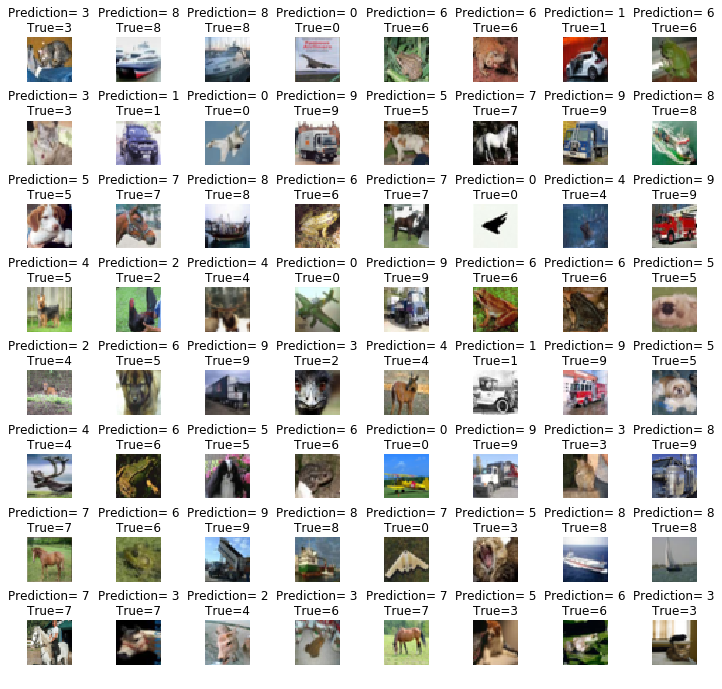

In [15]:
L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [28]:
predictions = model.predict(X_test)

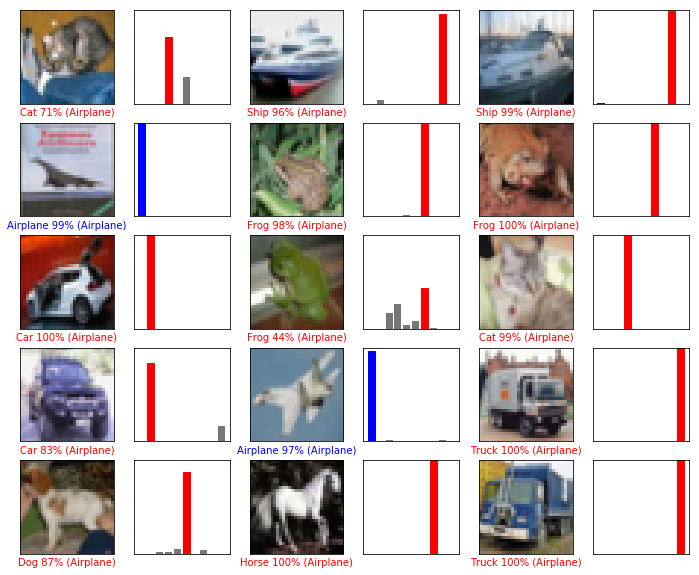

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.argmax(true_label)]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')
  
  
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()